In [2]:
import pandas as pd

# 50 positive reviews
positive_reviews = [
    "Amazing movie with a great story",
    "Loved the performances and direction",
    "A wonderful cinematic experience",
    "Brilliant acting and beautiful visuals",
    "An inspiring and emotional film",
    "Great screenplay and strong characters",
    "One of the best movies I have seen",
    "Excellent plot and execution",
    "A masterpiece worth watching",
    "Very engaging and entertaining",
    "Fantastic storytelling throughout",
    "Heartwarming and well made",
    "Superb music and cinematography",
    "A delightful and enjoyable film",
    "Powerful performances by the cast",
    "An outstanding and memorable movie",
    "Loved every minute of it",
    "A highly recommended film",
    "Great balance of emotion and drama",
    "An exceptional movie experience",
    "The movie was truly impressive",
    "Strong story with great direction",
    "Amazing visuals and sound design",
    "A beautifully crafted film",
    "The plot was engaging and smart",
    "Excellent acting by all actors",
    "A very satisfying movie",
    "One of my favorite movies",
    "The film exceeded expectations",
    "An emotionally rich movie",
    "Top-notch production quality",
    "The movie was fantastic",
    "Great pacing and storyline",
    "An enjoyable watch from start to end",
    "Very well executed film",
    "The acting was brilliant",
    "A compelling and touching story",
    "An entertaining and meaningful movie",
    "The direction was outstanding",
    "A truly enjoyable film",
    "Loved the story and characters",
    "The movie was refreshing",
    "A solid and well-made film",
    "An impressive piece of cinema",
    "Highly enjoyable movie",
    "A great movie overall",
    "The film was excellent",
    "Wonderful performances",
    "A must-watch movie",
    "Simply amazing film"
]

# 50 negative reviews
negative_reviews = [
    "Terrible movie with weak story",
    "Very boring and slow film",
    "Poor acting and bad direction",
    "A complete waste of time",
    "Disappointing and dull movie",
    "Bad screenplay and weak characters",
    "One of the worst movies ever",
    "The plot made no sense",
    "Very poorly executed film",
    "Uninteresting and forgettable",
    "Awful performances by the cast",
    "The movie was extremely boring",
    "Poorly written and directed",
    "Not worth watching at all",
    "A frustrating movie experience",
    "Very disappointing storyline",
    "Bad acting throughout the movie",
    "The film lacked depth",
    "An overrated and weak film",
    "The movie failed badly",
    "Terrible direction and editing",
    "A predictable and boring movie",
    "Poor production quality",
    "The movie was painful to watch",
    "Very weak and confusing plot",
    "The acting was horrible",
    "A dull and lifeless movie",
    "The film was disappointing",
    "Bad script and execution",
    "Not engaging at all",
    "The movie was a mess",
    "Extremely slow and boring",
    "Poor character development",
    "A badly made movie",
    "The story was terrible",
    "The movie was pointless",
    "Very low-quality film",
    "An unwatchable movie",
    "The plot was terrible",
    "Worst movie experience",
    "A forgettable and bad film",
    "The movie lacked substance",
    "Very disappointing film",
    "Poor storytelling",
    "The movie was annoying",
    "A poorly executed movie",
    "The film was a disaster",
    "Bad movie overall",
    "Completely boring film",
    "The movie was awful"
]

# Combine reviews and labels
reviews = positive_reviews + negative_reviews
sentiments = ["positive"] * 50 + ["negative"] * 50

# Create DataFrame
df_reviews = pd.DataFrame({
    "Review": reviews,
    "Sentiment": sentiments
})

print(df_reviews.head())
print("\nTotal rows:", len(df_reviews))


                                   Review Sentiment
0        Amazing movie with a great story  positive
1    Loved the performances and direction  positive
2        A wonderful cinematic experience  positive
3  Brilliant acting and beautiful visuals  positive
4         An inspiring and emotional film  positive

Total rows: 100


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

texts = df_reviews["Review"]

vectorizer = CountVectorizer(
    max_features=500,
    stop_words="english"
    )

X = vectorizer.fit_transform(texts)

# inspect results
print("Shape of feature matrix:", X.shape)
print("First 10 feature names:", vectorizer.get_feature_names_out()[:10])


Shape of feature matrix: (100, 125)
First 10 feature names: ['acting' 'actors' 'amazing' 'annoying' 'awful' 'bad' 'badly' 'balance'
 'beautiful' 'beautifully']


In [5]:
from sklearn.model_selection import train_test_split

X = X            # output from CountVectorizer
y = df_reviews["Sentiment"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.7


[[5 5]
 [1 9]]


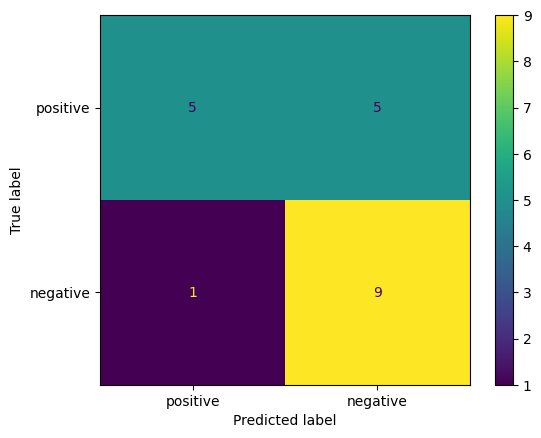

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=["positive", "negative"])
print(cm)

ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["positive", "negative"]
).plot()

plt.show()

In [12]:
def predict_review_sentiment(model, vectorizer, review) :
    review_vec = vectorizer.transform([review])
    prediction = model.predict(review_vec)
    return prediction[0]


review = input("Enter a review: ")
print(review ," : ", predict_review_sentiment(model, vectorizer, review))

Simply amazing film  :  positive
